# Case study: Healcare for all (notebook 2)

Antonio Montilla

In [9]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)

In [2]:
#importing dataset from Healcare for all (notebook 1)
data = pd.read_csv('Data_final_011223.csv')

In [3]:
data

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,donor_clas,TARGET_B,TARGET_D,letter
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0,2,36,0,IL,U,F,L,E,C,T,1,0,0.0,1
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0,1,14,3,CA,H,M,L,G,A,S,0,0,0.0,0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,

## Final regression model: estimating the size of donations

**Strategy:** subset those that have made a donation (Target B) and use that subset to create a model to predict how much money will they give (Target D) (Regression Model).

- Only look at people who have donated (Target B = 1)
- Use this new dataframe to create a model to predict how much they will donate (Target D)
- Using the regression model, make predictions on all of the people we recommend sending a letter to, that is those that the classification model predicted will donate AND those who have donated the last time (letter == 1).

#### Creating regression data

In [39]:
data_reg = data[data['TARGET_B']==1]
#will randomnize the data which will end up using in regression
data_reg = data_reg.sample(frac=1)
data_reg

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,donor_clas,TARGET_B,TARGET_D,letter
13425,9201,1,4801,50.000000,5.0,6.0,0,0,22,69,5,5,1,2,5.0,2365,668,749,99,0,0,50,50,91,3,1,3,6,1,0,1,0,0,0,0,4,0,0,1,30,37,38,28,38,40,35,37,40,22,8,29,40,16,4,2,1,16,16,35,21,12,4,1,2,8,27,65,39,14,3,73,7,1,19,258,314,99,95,0,0,0,0,0,0,0,1102,1130,7,8,90,10,96,4,0,61,89,80,54,94,6,7,2,4,7,6,3,26,62,2,1,2,0,0,6,66,97,99,0,1,88,66,68,18,4,0,0,0,10,0,0,0,97,99,99,99,1920.0,109.0,623.0,613,639,648,676,20557,3,2,8,19,34,24,5,3,2,1,3,5,16,38,27,5,2,2,5,0,64,1,56,44,24,86,8,2,2,0,0,0,2,3,1,85,29,31,6,81,83,94,74,91,72,71,60,48,99,5,14,32,5,15,17,0,1,6,0,6,1,1,1,1,2,2,22,9,2,8,11,14,8,3,1,3,6,6,1,5,1,2,5,85,3,0,151,1,3,16,30,7,36,8,7,25,3,24,4,0,0,0,11,22,0,69,7,5,2,0,11,1,8,0,0,7,2,0,1,0,0,1,0,0,4,46,90,5,3,1,99,82,26,4,11,3,23,49,99,99,0,1,1,69,0,31,0,0,0,99,0,99,99,99,11,3,3,1,14,36,4,11,75.0,3,1,25.0,9504,25.0,9210,25.0,9504,9210,9210.0,0.0,25.000000,1254,1,1,12.0,1,14,2,TX,H,M,L,G,A,S,0,1,30.0,1
8716,9501,0,2301,75.000000,2.0,8.0,2,5,35,31,41,3,5,5,5.0,1975,621,797,0,99,1,47,53,98,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,39,45,47,38,47,49,22,37,41,23,8,19,20,19,16,11,6,14,15,32,22,17,24,10,22,22,36,42,21,5,1,70,8,7,15,179,248,88,87,0,11,11,10,0,0,0,633,695,4,3,81,19,98,2,0,35,78,70,30,90,10,5,1,4,6,20,1,18,62,19,0,0,0,1,3,12,27,71,0,0,67,59,62,14,4,6,5,0,8,2,9,0,3,11,77,97,1660.0,181.0,659.0,309,326,351,391,13407,13,22,27,19,16,0,1,1,1,7,17,30,24,18,0,1,1,1,27,1,53,5,40,60,9,89,11,0,0,0,0,0,0,1,6,5,13,17,4,34,70,75,66,73,64,79,61,99,99,0,14,14,3,19,16,0,1,7,4,7,10,4,1,3,1,3,16,4,2,5,20,7,2,2,0,14,10,12,1,3,5,5,12,62,11,2,124,5,5,39,21,13,10,8,2,27,2,18,8,3,5,1,18,35,2,31,14,41,10,0,14,0,9,0,0,9,1,0,0,0,0,1,0,0,1,63,98,1,0,1,99,78,33,9,21,1,3,3,46,96,4,0,0,75,1,23,0,0,1,99,1,99,99,99,6,2,3,9,10,26,5,13,37.0,3,1,5.0,9410,20.0,9603,20.0,9603,9410,9602.0,16.0,12.333333,58566,1,2,37.0,2,40,3,other,H,M,L,F,C,T,0,1,16.0,1
67047,8601,0,3901,59.000000,4.0,0.0,0,0,37,24,38,3,6,1,5.0,8221,2605,3237,0,0,99,49,51,98,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,37,44,47,38,47,50,23,39,39,22,10,20,20,16,14,14,6,16,16,32,22,14,27,7,25,17,42,40,22,7,2,71,8,5,15,177,254,75,73,1,3,2,0,0,0,0,824,921,3,2,84

#### Splitting in X and Y

In [40]:
#for X, will drop also other targets and classification to reduce noise in the dataset
X = data_reg.drop(['donor_clas', 'TARGET_B', 'TARGET_D', 'letter'],axis=1)
y = data_reg['TARGET_D']

In [41]:
X

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
13425,9201,1,4801,50.000000,5.0,6.0,0,0,22,69,5,5,1,2,5.0,2365,668,749,99,0,0,50,50,91,3,1,3,6,1,0,1,0,0,0,0,4,0,0,1,30,37,38,28,38,40,35,37,40,22,8,29,40,16,4,2,1,16,16,35,21,12,4,1,2,8,27,65,39,14,3,73,7,1,19,258,314,99,95,0,0,0,0,0,0,0,1102,1130,7,8,90,10,96,4,0,61,89,80,54,94,6,7,2,4,7,6,3,26,62,2,1,2,0,0,6,66,97,99,0,1,88,66,68,18,4,0,0,0,10,0,0,0,97,99,99,99,1920.0,109.0,623.0,613,639,648,676,20557,3,2,8,19,34,24,5,3,2,1,3,5,16,38,27,5,2,2,5,0,64,1,56,44,24,86,8,2,2,0,0,0,2,3,1,85,29,31,6,81,83,94,74,91,72,71,60,48,99,5,14,32,5,15,17,0,1,6,0,6,1,1,1,1,2,2,22,9,2,8,11,14,8,3,1,3,6,6,1,5,1,2,5,85,3,0,151,1,3,16,30,7,36,8,7,25,3,24,4,0,0,0,11,22,0,69,7,5,2,0,11,1,8,0,0,7,2,0,1,0,0,1,0,0,4,46,90,5,3,1,99,82,26,4,11,3,23,49,99,99,0,1,1,69,0,31,0,0,0,99,0,99,99,99,11,3,3,1,14,36,4,11,75.0,3,1,25.0,9504,25.0,9210,25.0,9504,9210,9210.0,0.0,25.000000,1254,1,1,12.0,1,14,2,TX,H,M,L,G,A,S
8716,9501,0,2301,75.000000,2.0,8.0,2,5,35,31,41,3,5,5,5.0,1975,621,797,0,99,1,47,53,98,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,39,45,47,38,47,49,22,37,41,23,8,19,20,19,16,11,6,14,15,32,22,17,24,10,22,22,36,42,21,5,1,70,8,7,15,179,248,88,87,0,11,11,10,0,0,0,633,695,4,3,81,19,98,2,0,35,78,70,30,90,10,5,1,4,6,20,1,18,62,19,0,0,0,1,3,12,27,71,0,0,67,59,62,14,4,6,5,0,8,2,9,0,3,11,77,97,1660.0,181.0,659.0,309,326,351,391,13407,13,22,27,19,16,0,1,1,1,7,17,30,24,18,0,1,1,1,27,1,53,5,40,60,9,89,11,0,0,0,0,0,0,1,6,5,13,17,4,34,70,75,66,73,64,79,61,99,99,0,14,14,3,19,16,0,1,7,4,7,10,4,1,3,1,3,16,4,2,5,20,7,2,2,0,14,10,12,1,3,5,5,12,62,11,2,124,5,5,39,21,13,10,8,2,27,2,18,8,3,5,1,18,35,2,31,14,41,10,0,14,0,9,0,0,9,1,0,0,0,0,1,0,0,1,63,98,1,0,1,99,78,33,9,21,1,3,3,46,96,4,0,0,75,1,23,0,0,1,99,1,99,99,99,6,2,3,9,10,26,5,13,37.0,3,1,5.0,9410,20.0,9603,20.0,9603,9410,9602.0,16.0,12.333333,58566,1,2,37.0,2,40,3,other,H,M,L,F,C,T
67047,8601,0,3901,59.000000,4.0,0.0,0,0,37,24,38,3,6,1,5.0,8221,2605,3237,0,0,99,49,51,98,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,37,44,47,38,47,50,23,39,39,22,10,20,20,16,14,14,6,16,16,32,22,14,27,7,25,17,42,40,22,7,2,71,8,5,15,177,254,75,73,1,3,2,0,0,0,0,824,921,3,2,84,16,91,9,33,34,80,72,29,91,9,5,1,4,9,14,2,19,58,21,0,1,0,3

#### Splitting into train & test:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

#### Creating X_train_num & X_test_num

In [43]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_num

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE
29087,8601,2,3606,62.000000,1.0,4.0,0,3,34,43,19,7,9,4,4.0,2324,626,811,0,0,99,51,49,73,24,0,1,2,0,0,0,0,0,0,0,1,0,0,0,30,38,41,32,41,45,29,37,39,24,14,27,23,14,12,7,3,15,16,32,21,16,16,5,13,20,28,52,30,14,6,56,13,7,23,209,284,50,49,0,0,0,0,0,0,0,529,569,3,2,78,22,81,19,1,46,77,58,33,88,12,13,2,11,15,13,3,17,48,8,6,15,3,0,1,7,20,56,0,2,39,50,52,15,4,0,0,48,9,0,0,14,2,6,27,76,600.0,421.0,520.0,259,304,280,304,9796,29,19,20,23,7,3,0,1,0,21,20,20,27,9,1,0,1,0,18,11,19,18,46,54,9,71,22,0,0,0,0,0,2,4,10,10,24,28,3,81,72,82,61,78,59,62,44,61,99,9,5,11,3,9,15,0,2,13,4,20,13,4,2,4,0,13,19,4,3,2,21,2,3,3,1,13,5,3,3,7,9,4,7,68,4,1,120,12,13,42,15,7,9,1,3,24,2,21,4,2,3,0,17,34,1,43,28,19,15,0,3,0,4,0,0,5,0,0,0,0,0,2,0,0,2,64,93,4,1,3,91,57,21,5,16,4,25,41,67,84,16,0,0,31,30,35,1,0,3,59,41,8,99,90,6,2,8,7,29,69,5,12,101.0,18,12,2.0,9409,10.0,8702,5.0,9603,8609,8702.0,5.0,5.611111,29724,1,4,54.0,2,43,3
51148,9601,0,0,61.611649,2.0,6.0,0,0,24,39,20,8,7,4,5.0,6295,1408,1562,99,0,1,50,50,98,0,0,1,2,0,0,0,0,0,0,0,1,0,0,1,19,35,37,25,39,41,47,36,47,18,13,32,28,12,7,5,2,13,16,39,22,10,11,3,10,8,19,73,59,38,21,72,6,2,20,344,394,94,93,1,2,1,0,0,0,0,693,729,3,3,89,11,96,4,5,68,90,82,62,96,4,6,1,5,5,6,2,41,52,6,0,0,0,0,1,7,34,94,0,1,62,64,63,21,6,2,0,3,8,2,0,1,16,25,48,84,7160.0,291.0,770.0,343,357,367,383,9139,10,17,24,28,17,3,0,0,0,6,16,26,30,18,4,0,0,0,13,3,36,5,35,65,3,74,16,2,2,0,0,1,4,4,0,7,23,27,5,74,74,87,62,83,59,67,57,82,99,1,11,11,2,11,21,0,2,8,2,14,7,6,4,3,3,7,15,7,4,4,17,5,4,3,1,4,10,6,6,8,7,4,6,69,5,0,120,2,10,42,25,9,9,2,3,39,4,34,4,0,0,0,13,24,2,39,14,20,14,0,30,0,4,0,0,1,1,0,0,0,0,1,1,0,2,81,97,2,0,1,99,84,34,7,15,2,19,36,76,85,15,0,0,93,0,5,0,0,2,99,1,90,99,97,8,3,3,3,4,10,3,8,20.0,1,1,20.0,9603,20.0,9603,20.0,9603,9603,9504.0,0.0,20.000000,134159,1,1,38.0,2,40,3
3538,8601,1,4201,56.000000,3.0,6.0,0,0,35,22,28,8,8,2,9.0,2670,748,834,99,0,0,49,51,76,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,39,42,31,43,45,33,35,44,21,11,24,26,16,12,8,3,13,15,35,24,13,17,5,15,9,27,64,42,16,5,68,6,5,21,263,319,87,86,7,9,2,2,0,0,0,825,840,3,3,82,18,96,4,0,54,90,76,45,95,5,9,2,8,6,9,1,21,47,8,7,14,3,1,3,21,62,88,0,0,60,57,60,17,5,9,0,4,8,7,2,0,12,17,57,79,760.0,249.0,716.0,488,522,

#### Scaling X_train_num

In [44]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
x_standardized = MinMaxtransformer.transform(X_train_num)
print(x_standardized.shape)
X_train_num_s = pd.DataFrame(x_standardized, columns=X_train_num.columns)
X_train_num_s

(3874, 325)


,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE
0,0.000000,0.000051,0.387325,0.617021,0.000000,0.444444,0.000000,0.031250,0.435897,0.434343,0.191919,0.179487,0.18,0.097561,0.444444,0.037967,0.041653,0.029993,0.0,0.000000,1.000000,0.515152,0.644737,0.737374,0.242424,0.000000,0.011111,0.020408,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.010870,0.000000,0.000000,0.000000,0.379747,0.481013,0.5125,0.421053,0.539474,0.592105,0.408451,0.373737,0.393939,0.242424,0.153846,0.272727,0.232323,0.411765,0.307692,0.134615,0.045455,0.151515,0.484848,0.477612,0.42,0.195122,0.163265,0.060976,0.134021,0.212766,0.341463,0.525253,0.303030,0.141414,0.060606,0.565657,0.131313,0.125000,0.250000,0.321538,0.405714,0.505051,0.494949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088462,0.095904,0.230769,0.153846,0.787879,0.222222,0.818182,0.193878,0.010101,0.464646,0.777778,0.585859,0.333333,0.888889,0.121212,0.224138,0.2,0.196429,0.182927,0.173333,0.053571,0.239437,0.484848,0.082474,0.139535,0.217391,0.069767,0.000000,0.010101,0.070707,0.202020,0.565657,0.000000,0.022222,0.393939,0.595238,0.590909,0.245902,0.285714,0.000000,0.000000,0.484848,0.090909,0.000000,0.000000,0.304348,0.020202,0.060606,0.272727,0.767677,0.064103,0.652713,0.590238,0.172667,0.202667,0.200861,0.218077,0.056130,0.298969,0.345455,0.425532,0.389831,0.102941,0.056604,0.000000,0.047619,0.000000,0.212121,0.202020,0.202020,0.272727,0.107143,0.023810,0.000000,0.043478,0.000000,0.181818,0.200000,0.195876,0.272727,0.464646,0.580645,0.095745,0.717172,0.261905,0.000000,0.000000,0.0,0.0,0.000000,0.022222,0.102564,0.133333,0.112360,0.266667,0.528302,0.06,0.818182,0.727273,0.828283,0.616162,0.787879,0.595960,0.626263,0.444444,0.616162,1.000000,0.090909,0.064103,0.215686,0.100000,0.134328,0.220588,0.0,0.04,0.175676,0.057143,0.416667,0.317073,0.08,0.090909,0.057143,0.000000,0.232143,0.301587,0.066667,0.142857,0.04,0.247059,0.060606,0.107143,0.050000,0.016393,0.236364,0.069444,0.065217,0.081081,0.194444,0.18,0.097561,0.132075,0.686869,0.100,0.071429,0.705882,0.184615,0.232143,0.617647,0.319149,0.225806,0.160714,0.016949,0.037037,0.347826,0.2,0.477273,0.046512,0.024691,0.032258,0.0,0.34,0.400000,0.045455,0.434343,0.282828,0.191919,0.151515,0.

#### Using trained scaler to scale X_test_num

In [45]:
x_standardized = MinMaxtransformer.transform(X_test_num)
print(x_standardized.shape)
X_test_num_s = pd.DataFrame(x_standardized, columns=X_test_num.columns)
X_test_num_s

(969, 325)


,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE
0,0.727273,0.000000,0.504941,0.500000,0.333333,1.000000,0.004167,0.000000,0.358974,0.404040,0.444444,0.102564,0.10,0.097561,0.555556,0.026090,0.030674,0.022300,1.000000,0.0,0.000000,0.484848,0.684211,0.949495,0.010101,0.012821,0.044444,0.020408,0.000000,0.017544,0.013889,0.023810,0.041667,0.000000,0.0,0.000000,0.000000,0.000000,0.020833,0.455696,0.544304,0.5625,0.473684,0.592105,0.631579,0.323944,0.393939,0.404040,0.212121,0.142857,0.171717,0.232323,0.558824,0.333333,0.211538,0.060606,0.131313,0.454545,0.507463,0.40,0.219512,0.214286,0.085366,0.195876,0.202128,0.426829,0.464646,0.272727,0.070707,0.020202,0.626263,0.101010,0.089286,0.239130,0.290769,0.377143,0.777778,0.757576,0.015152,0.222222,0.212121,0.191919,0.0,0.0,0.0,0.253512,0.263273,0.384615,0.461538,0.797980,0.212121,0.989899,0.020408,0.090909,0.343434,0.767677,0.656566,0.282828,0.878788,0.131313,0.103448,0.1,0.089286,0.121951,0.266667,0.071429,0.253521,0.616162,0.154639,0.000000,0.014493,0.000000,0.161616,0.515152,0.858586,0.979798,1.000000,0.010101,0.011111,0.646465,0.797619,0.715909,0.229508,0.285714,0.065934,0.161616,0.000000,0.070707,0.028169,0.121212,0.000000,0.575758,0.888889,0.939394,0.959596,0.811966,0.162791,0.929625,0.346000,0.370000,0.378049,0.393113,0.115268,0.051546,0.290909,0.297872,0.220339,0.529412,0.150943,0.103448,0.095238,0.036585,0.050505,0.090909,0.181818,0.111111,0.476190,0.214286,0.129032,0.086957,0.022989,0.202020,0.018182,0.505155,0.045455,0.494949,0.548387,0.127660,0.787879,0.142857,0.134615,0.159091,0.000000,0.0,0.0,0.022222,0.025641,0.000000,0.662921,0.322222,0.547170,0.06,0.737374,0.747475,0.838384,0.656566,0.808081,0.656566,0.676768,0.686869,0.404040,1.000000,0.040404,0.217949,0.313725,0.100000,0.268657,0.235294,0.00,0.02,0.094595,0.000000,0.312500,0.073171,0.04,0.045455,0.000000,0.000000,0.125000,0.285714,0.066667,0.142857,0.04,0.200000,0.303030,0.142857,0.066667,0.049180,0.181818,0.111111,0.086957,0.108108,0.111111,0.10,0.097561,0.150943,0.686869,0.200,0.142857,0.823529,0.030769,0.107143,0.455882,0.446809,0.387097,0.303571,0.203390,0.086420,0.333333,0.2,0.409091,0.116279,0.000000,0.000000,0.000000,0.28,0.329412,0.000000,0.404040,0.262626,0.444444,0.050505,0

#### Creating X_train_cat & X_test_cat

In [46]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)
X_train_cat

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
29087,GA,H,F,L,D,B,R
51148,other,H,F,L,F,B,T
3538,other,H,M,L,D,B,T
73755,TX,H,M,L,G,B,C
8753,CA,H,F,L,G,C,C
...,...,...,...,...,...,...,...
50695,CA,H,F,L,G,B,S
57332,other,H,F,L,F,D,T
89983,other,H,M,L,E,A,S
91741,IN,U,M,L,D,D,R


#### One-hot encoding X_train_cat

In [47]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
encoded = encoder.transform(X_train_cat).toarray()
X_train_cat_onehot_encoded = pd.DataFrame(encoded, columns=cols)
X_train_cat_onehot_encoded 

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### One-hot encoding X_test_cat

In [48]:
encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_onehot_encoded = pd.DataFrame(encoded, columns=cols)
X_test_cat_onehot_encoded 

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Concatenating X_train from X_train_num_s & X_train_cat_onehot_encoded

In [49]:
X_train = pd.concat([X_train_num_s, X_train_cat_onehot_encoded], axis=1)
display(X_train.dtypes)
X_train

ODATEDW       float64
TCODE         float64
DOB           float64
AGE           float64
INCOME        float64
               ...   
GEOCODE2_D    float64
DOMAIN_A_R    float64
DOMAIN_A_S    float64
DOMAIN_A_T    float64
DOMAIN_A_U    float64
Length: 349, dtype: object

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000000,0.000051,0.387325,0.617021,0.000000,0.444444,0.000000,0.031250,0.435897,0.434343,0.191919,0.179487,0.18,0.097561,0.444444,0.037967,0.041653,0.029993,0.0,0.000000,1.000000,0.515152,0.644737,0.737374,0.242424,0.000000,0.011111,0.020408,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.010870,0.000000,0.000000,0.000000,0.379747,0.481013,0.5125,0.421053,0.539474,0.592105,0.408451,0.373737,0.393939,0.242424,0.153846,0.272727,0.232323,0.411765,0.307692,0.134615,0.045455,0.151515,0.484848,0.477612,0.42,0.195122,0.163265,0.060976,0.134021,0.212766,0.341463,0.525253,0.303030,0.141414,0.060606,0.565657,0.131313,0.125000,0.250000,0.321538,0.405714,0.505051,0.494949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088462,0.095904,0.230769,0.153846,0.787879,0.222222,0.818182,0.193878,0.010101,0.464646,0.777778,0.585859,0.333333,0.888889,0.121212,0.224138,0.2,0.196429,0.182927,0.173333,0.053571,0.239437,0.484848,0.082474,0.139535,0.217391,0.069767,0.000000,0.010101,0.070707,0.202020,0.565657,0.000000,0.022222,0.393939,0.595238,0.590909,0.245902,0.285714,0.000000,0.000000,0.484848,0.090909,0.000000,0.000000,0.304348,0.020202,0.060606,0.272727,0.767677,0.064103,0.652713,0.590238,0.172667,0.202667,0.200861,0.218077,0.056130,0.298969,0.345455,0.425532,0.389831,0.102941,0.056604,0.000000,0.047619,0.000000,0.212121,0.202020,0.202020,0.272727,0.107143,0.023810,0.000000,0.043478,0.000000,0.181818,0.200000,0.195876,0.272727,0.464646,0.580645,0.095745,0.717172,0.261905,0.000000,0.000000,0.0,0.0,0.000000,0.022222,0.102564,0.133333,0.112360,0.266667,0.528302,0.06,0.818182,0.727273,0.828283,0.616162,0.787879,0.595960,0.626263,0.444444,0.616162,1.000000,0.090909,0.064103,0.215686,0.100000,0.134328,0.220588,0.0,0.04,0.175676,0.057143,0.416667,0.317073,0.08,0.090909,0.057143,0.000000,0.232143,0.301587,0.066667,0.142857,0.04,0.247059,0.060606,0.107143,0.050000,0.016393,0.236364,0.069444,0.065217,0.081081,0.194444,0.1

#### Repeting for X_Test

In [50]:
X_test = pd.concat([X_test_num_s, X_test_cat_onehot_encoded], axis=1)
display(X_test.dtypes)
X_test

ODATEDW       float64
TCODE         float64
DOB           float64
AGE           float64
INCOME        float64
               ...   
GEOCODE2_D    float64
DOMAIN_A_R    float64
DOMAIN_A_S    float64
DOMAIN_A_T    float64
DOMAIN_A_U    float64
Length: 349, dtype: object

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.727273,0.000000,0.504941,0.500000,0.333333,1.000000,0.004167,0.000000,0.358974,0.404040,0.444444,0.102564,0.10,0.097561,0.555556,0.026090,0.030674,0.022300,1.000000,0.0,0.000000,0.484848,0.684211,0.949495,0.010101,0.012821,0.044444,0.020408,0.000000,0.017544,0.013889,0.023810,0.041667,0.000000,0.0,0.000000,0.000000,0.000000,0.020833,0.455696,0.544304,0.5625,0.473684,0.592105,0.631579,0.323944,0.393939,0.404040,0.212121,0.142857,0.171717,0.232323,0.558824,0.333333,0.211538,0.060606,0.131313,0.454545,0.507463,0.40,0.219512,0.214286,0.085366,0.195876,0.202128,0.426829,0.464646,0.272727,0.070707,0.020202,0.626263,0.101010,0.089286,0.239130,0.290769,0.377143,0.777778,0.757576,0.015152,0.222222,0.212121,0.191919,0.0,0.0,0.0,0.253512,0.263273,0.384615,0.461538,0.797980,0.212121,0.989899,0.020408,0.090909,0.343434,0.767677,0.656566,0.282828,0.878788,0.131313,0.103448,0.1,0.089286,0.121951,0.266667,0.071429,0.253521,0.616162,0.154639,0.000000,0.014493,0.000000,0.161616,0.515152,0.858586,0.979798,1.000000,0.010101,0.011111,0.646465,0.797619,0.715909,0.229508,0.285714,0.065934,0.161616,0.000000,0.070707,0.028169,0.121212,0.000000,0.575758,0.888889,0.939394,0.959596,0.811966,0.162791,0.929625,0.346000,0.370000,0.378049,0.393113,0.115268,0.051546,0.290909,0.297872,0.220339,0.529412,0.150943,0.103448,0.095238,0.036585,0.050505,0.090909,0.181818,0.111111,0.476190,0.214286,0.129032,0.086957,0.022989,0.202020,0.018182,0.505155,0.045455,0.494949,0.548387,0.127660,0.787879,0.142857,0.134615,0.159091,0.000000,0.0,0.0,0.022222,0.025641,0.000000,0.662921,0.322222,0.547170,0.06,0.737374,0.747475,0.838384,0.656566,0.808081,0.656566,0.676768,0.686869,0.404040,1.000000,0.040404,0.217949,0.313725,0.100000,0.268657,0.235294,0.00,0.02,0.094595,0.000000,0.312500,0.073171,0.04,0.045455,0.000000,0.000000,0.125000,0.285714,0.066667,0.142857,0.04,0.200000,0.303030,0.142857,0.066667,0.049180,0.181818,0.111111,0.086957,0.108108,0.111111,0.10,0.

### Building a Principal Component Analysis in X_train to reduce dimension before modeling

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

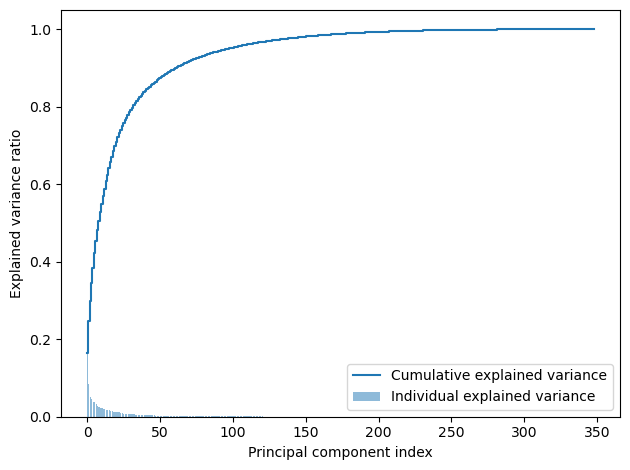

In [52]:
#plotting the cumulative explained variance for choosing number of components
exp_var_pca = pca.explained_variance_ratio_
cum_sum_variance = np.cumsum(exp_var_pca)
cum_sum_variance

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_variance)), cum_sum_variance, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [53]:
#will use 60 components, which account for roughly 90% of the variance
pca.explained_variance_ratio_[:60].sum()

0.8962385445801934

In [54]:
pca = PCA(60)
pca.fit(X_train)

PCA(n_components=60)

In [55]:
#creating the X_train_pca and X_test_pca:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [56]:
X_train_pca.shape

(3874, 60)

## Modelling: running different regression algorithms on X_train_pca and y

In [65]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']

scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_pca, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -0.332785676372512, 'Linear Regression': 0.34640396462113626, 'KNN': 0.1856712888451046}


In [67]:
val_scores = {}
for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train_pca, y_train)
    val_scores[model_name] = model.score(X_test_pca, y_test)
print(val_scores)

{'Decision Tree Regressor': -0.8386947009835934, 'Linear Regression': 0.375828044518827, 'KNN': 0.13462414209786}


### Double checking: Using feature selection in X_train to reduce dimension before modeling

In [60]:
#Using same columns as in the classification model:
selected_k_best = ['RFA_2F', 'RFA_2A_G', 'RFA_2A_E', 'LASTDATE', 'CARDGIFT', 'HVP1', 'RP1', 'ETH2', 'NGIFTALL', 'HV1', 'STATE_GA', 'DOMAIN_B', 'CONTROLN', 'CLUSTER2', 'INCOME', 'DOMAIN_A_S', 'STATE_other', 'STATE_IL', 'MSA', 'HOMEOWNR_U', 'NEXTDATE', 'HC6', 'DOMAIN_A_U', 'HC9', 'STATE_WA', 'HU5', 'DOMAIN_A_R', 'POBC2']

In [61]:
X_train_k_best = X_train.loc[:, selected_k_best]
X_train_k_best

,RFA_2F,RFA_2A_G,RFA_2A_E,LASTDATE,CARDGIFT,HVP1,RP1,ETH2,NGIFTALL,HV1,STATE_GA,DOMAIN_B,CONTROLN,CLUSTER2,INCOME,DOMAIN_A_S,STATE_other,STATE_IL,MSA,HOMEOWNR_U,NEXTDATE,HC6,DOMAIN_A_U,HC9,STATE_WA,HU5,DOMAIN_A_R,POBC2
0,1.000000,0.0,0.0,0.502513,0.413793,0.000000,0.020202,0.242424,0.188889,0.088462,1.0,0.333333,0.154938,0.868852,0.000000,0.0,0.0,0.0,0.064103,0.0,0.471708,0.676768,0.0,0.00000,0.0,0.010101,1.0,0.646465
1,0.000000,0.0,0.0,0.502513,0.034483,0.000000,0.161616,0.000000,0.000000,0.115886,0.0,0.333333,0.699531,0.606557,0.166667,0.0,1.0,0.0,0.764957,0.0,0.895822,0.767677,0.0,0.00000,0.0,0.050505,0.0,0.818182
2,1.000000,0.0,0.0,0.492462,0.620690,0.010101,0.121212,0.242424,0.355556,0.137960,0.0,0.000000,0.572038,0.229508,0.333333,0.0,1.0,0.0,0.081197,0.0,0.472237,0.575758,0.0,0.00000,0.0,0.000000,0.0,0.717172
3,0.333333,1.0,0.0,0.045226,0.137931,0.000000,0.202020,0.010101,0.077778,0.071405,0.0,0.333333,0.647098,0.163934,0.666667,0.0,0.0,0.0,0.089744,0.0,0.791645,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.646465
4,0.000000,1.0,0.0,0.035176,0.310345,0.050505,0.151515,0.010101,0.111111,0.155017,0.0,0.333333,0.899112,0.770492,0.666667,0.0,0.0,0.0,0.173077,0.0,0.424114,0.111111,0.0,0.02381,0.0,0.121212,0.0,0.656566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.000000,1.0,0.0,0.045226,0.068966,0.000000,0.181818,0.111111,0.011111,0.201171,0.0,0.000000,0.861994,0.901639,0.833333,1.0,0.0,0.0,0.867521,0.0,0.900053,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.787879
3870,0.000000,0.0,0.0,0.502513,0.241379,0.000000,0.050505,0.010101,0.111111,0.065552,0.0,0.333333,0.593392,0.836066,0.333333,0.0,1.0,0.0,0.000000,0.0,0.524590,0.101010,0.0,0.00000,0.0,0.040404,0.0,0.818182
3871,0.666667,0.0,1.0,0.497487,0.068966,0.010101,0.404040,0.040404,0.022222,0.177759,0.0,0.000000,0.431878,0.016393,0.666667,1.0,1.0,0.0,0.547009,0.0,0.899524,0.373737,0.0,0.00000,0.0,0.000000,0.0,0.737374
3872,0.666667,0.0,0.0,0.492462,0.344828,0.000000,0.000000,0.000000,0.166667,0.102007,0.0,0.333333,0.323538,0.704918,0.666667,0.0,0.0,0.0,0.294872,1.0,0.528292,0.363636,0.0,0.00000,0.0,0.101010,1.0,0.868687


In [62]:
X_test_k_best = X_test.loc[:, selected_k_best]
X_test_k_best

,RFA_2F,RFA_2A_G,RFA_2A_E,LASTDATE,CARDGIFT,HVP1,RP1,ETH2,NGIFTALL,HV1,STATE_GA,DOMAIN_B,CONTROLN,CLUSTER2,INCOME,DOMAIN_A_S,STATE_other,STATE_IL,MSA,HOMEOWNR_U,NEXTDATE,HC6,DOMAIN_A_U,HC9,STATE_WA,HU5,DOMAIN_A_R,POBC2
0,1.000000,0.0,0.0,0.040201,0.206897,0.161616,0.575758,0.010101,0.122222,0.253512,0.0,0.000000,0.931266,0.049180,0.333333,1.0,0.0,0.0,0.811966,1.0,0.842411,0.535354,0.0,0.166667,1.0,0.090909,0.0,0.444444
1,0.000000,0.0,0.0,0.492462,0.034483,0.444444,0.686869,0.000000,0.000000,0.317224,0.0,0.000000,0.461810,0.114754,1.000000,0.0,0.0,1.0,0.170940,1.0,0.895822,0.424242,1.0,0.559524,0.0,0.030303,0.0,0.676768
2,0.666667,0.0,1.0,0.502513,0.068966,0.000000,0.131313,0.000000,0.033333,0.114381,0.0,0.333333,0.227271,0.229508,0.666667,0.0,0.0,0.0,0.282051,1.0,0.895822,0.383838,0.0,0.000000,0.0,0.000000,0.0,0.797980
3,1.000000,1.0,0.0,0.502513,0.137931,0.666667,0.989899,0.020202,0.088889,0.517057,0.0,0.000000,0.816407,0.180328,1.000000,1.0,0.0,0.0,0.635150,0.0,0.685880,1.000000,0.0,0.261905,0.0,0.050505,0.0,0.474747
4,0.000000,1.0,0.0,0.497487,0.034483,0.000000,0.313131,0.010101,0.000000,0.138963,0.0,0.333333,0.680065,0.311475,0.500000,1.0,1.0,0.0,0.222222,0.0,0.895822,0.979798,0.0,0.000000,0.0,0.010101,0.0,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.666667,0.0,0.0,0.045226,0.310345,0.010101,0.383838,0.000000,0.188889,0.119900,0.0,0.333333,0.028858,0.196721,0.666667,0.0,0.0,0.0,0.802350,1.0,0.528821,0.929293,0.0,0.011905,0.0,0.848485,0.0,0.141414
965,1.000000,0.0,0.0,0.045226,0.137931,0.000000,0.323232,0.010101,0.122222,0.129264,0.0,0.000000,0.586608,0.163934,0.666667,0.0,1.0,0.0,0.290598,0.0,0.842411,0.272727,0.0,0.000000,0.0,0.131313,0.0,0.616162
966,1.000000,0.0,0.0,0.497487,0.448276,0.333333,0.252525,0.080808,0.211111,0.269231,0.0,0.000000,0.981102,0.180328,0.666667,0.0,0.0,0.0,0.709402,1.0,0.579059,0.787879,0.0,0.059524,0.0,0.050505,0.0,0.313131
967,0.333333,0.0,0.0,0.497487,0.241379,0.989899,0.949495,0.020202,0.144444,0.594649,0.0,0.000000,0.852566,0.016393,0.666667,0.0,0.0,0.0,0.635150,1.0,0.524590,0.444444,1.0,0.142857,0.0,0.141414,0.0,0.555556


#### Running models

In [68]:
model11 = DecisionTreeRegressor()
model22 = LinearRegression()
model33 = KNeighborsRegressor()
model_pipeline2 = [model11, model22, model33]
model_names2 = ['Decision Tree Regressor', 'Linear Regression', 'KNN']

scores = {}
for model, model_name in zip(model_pipeline2, model_names2):
    mean_score = np.mean(cross_val_score(model, X_train_k_best, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -0.32030448955244933, 'Linear Regression': 0.34118941893196075, 'KNN': 0.2624940236586243}


In [69]:
val_scores = {}
for model, model_name in zip(model_pipeline22,model_names22):
    model.fit(X_train_k_best, y_train)
    val_scores[model_name] = model.score(X_test_k_best, y_test)
print(val_scores)

{'Decision Tree Regressor': -1.0510009441826003, 'Linear Regression': 0.35364355124911084, 'KNN': 0.21979622509634655}


**Observations regarding modelling:**
- The R2 of the models suggest a limited fit for predicting TARGET D.
- However, the best model seems to be a linear regressor using PCA.
- I will therefore use this model to make predictions for the selected individuals we are recommending sending letters to.

In [76]:
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)

LinearRegression()

In [77]:
lr_model.score(X_test_pca, y_test)

0.375828044518827

## Making predictions on potential donors using LinearRegression() model

In [70]:
#creating data with potential donors ('letter' == 1)
data_donors = data[data['letter']==1]

In [71]:
data_donors

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,donor_clas,TARGET_B,TARGET_D,letter
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0,2,36,0,IL,U,F,L,E,C,T,1,0,0.0,1
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3,2,0,7,8,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,3,1,23,1,16,6,0,0,0,10,21,0,28,23,32,8,1,14,1,5,0,0,7,0,0,0,0,0,1,0,0,2,84,96,3,0,0,92,65,29,9,22,3,12,23,50,69,31,0,0,0,6,35,44,0,15,22,77,17,97,92,9,2,6,5,26,63,6,14,202.0,27,14,2.0,9111,16.0,9207,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0,2,43,3,NC,U,M,L,E,C,R,1,0,0.0,1
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,31,3,0,3,0.0,640,160,219,0,8,92,54,46,61,0,0,11,32,6,2,0,0,0,0,0,31,0,0,1,32,40,44,34,43,47,25,45,35,20,15,25,17,17,12,7,7,20,17,30,14,19,25,11,23,23,27,50,30,15,8,63,9,6,23,199,283,85,83,3,4,1,0,2,0,2,1000,1263,2,

In [73]:
#Selecting and transforming X for building predictions:
X_pred = data_donors.drop(['donor_clas', 'TARGET_B', 'TARGET_D', 'letter'],axis=1)
X_pred.shape

(41463, 332)

In [74]:
#scaling numerical
X_pred_num = X_pred.select_dtypes(np.number)
x_pred_standardized = MinMaxtransformer.transform(X_pred_num)
X_pred_num_s = pd.DataFrame(x_pred_standardized, columns=X_pred_num.columns)
X_pred_num_s

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE
0,0.272727,0.000000,0.398711,0.595745,0.666667,0.666667,0.000000,0.000000,0.500000,0.343434,0.181818,0.256410,0.04,0.024390,0.555556,0.016206,0.017566,0.012278,0.0,0.353535,0.656566,0.474747,0.697368,0.929293,0.010101,0.000000,0.000000,0.112245,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.119565,0.0,0.0,0.000000,0.493671,0.607595,0.6375,0.526316,0.657895,0.710526,0.352113,0.313131,0.424242,0.272727,0.120879,0.141414,0.181818,0.500000,0.333333,0.211538,0.227273,0.121212,0.333333,0.507463,0.50,0.219512,0.265306,0.121951,0.237113,0.191489,0.402439,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.214286,0.206522,0.304615,0.394286,0.979798,0.959596,0.030303,0.020202,0.000000,0.000000,0.070707,0.090909,0.000000,0.080100,0.107028,0.230769,0.153846,0.868687,0.141414,0.969697,0.040816,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.103448,0.2,0.089286,0.109756,0.200000,0.053571,0.239437,0.505051,0.257732,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.011111,0.616162,0.690476,0.693182,0.245902,0.285714,0.021978,0.000000,0.000000,0.141414,0.014085,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.274419,0.774120,0.204667,0.212000,0.250359,0.271162,0.073818,0.134021,0.418182,0.489362,0.389831,0.220588,0.018868,0.000000,0.000000,0.012195,0.040404,0.252525,0.242424,0.262626,0.202381,0.047619,0.000000,0.000000,0.022989,0.282828,0.072727,0.525773,0.015152,0.464646,0.580645,0.031915,0.888889,0.095238,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.102564,0.013333,0.146067,0.155556,0.301887,0.04,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.000000,0.000000,0.115385,0.058824,0.266667,0.194030,0.132353,0.00,0.06,0.121622,0.042857,0.312500,0.463415,0.10,0.181818,0.042857,0.000000,0.053571,0.650794,0.016667,0.000000,0.14,0.152941,0.181818,0.178571,0.000000,0.065574,0.163636,0.055556,0.021739,0.081081,0.277778,0.04,0.024390,0.132075,0.787879,0.050,0.000000,0.705882,0.246154,0.178571,0.573529,0.446809,0.258065,0.071429,0.050847,0.061728,0.289855,0.3,0.431818,0.046512,0.000000,0.000000,0.000000,0.36,0.458824,0.000000,0.343434,0.232323,0.181818,0.161616,0.0192

In [75]:
#encoding categorical
X_pred_cat = X_pred.select_dtypes(object)
encoded_pred = encoder.transform(X_pred_cat).toarray()
X_pred_cat_onehot_encoded = pd.DataFrame(encoded_pred, columns=cols)
X_test_cat_onehot_encoded 

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
#Concatenating X_pred_s from X_pred_num_s & X_pred_cat_onehot_encoded
X_pred_s = pd.concat([X_pred_num_s, X_pred_cat_onehot_encoded], axis=1)
X_pred_s

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.272727,0.000000,0.398711,0.595745,0.666667,0.666667,0.000000,0.000000,0.500000,0.343434,0.181818,0.256410,0.04,0.024390,0.555556,0.016206,0.017566,0.012278,0.0,0.353535,0.656566,0.474747,0.697368,0.929293,0.010101,0.000000,0.000000,0.112245,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.119565,0.0,0.0,0.000000,0.493671,0.607595,0.6375,0.526316,0.657895,0.710526,0.352113,0.313131,0.424242,0.272727,0.120879,0.141414,0.181818,0.500000,0.333333,0.211538,0.227273,0.121212,0.333333,0.507463,0.50,0.219512,0.265306,0.121951,0.237113,0.191489,0.402439,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.214286,0.206522,0.304615,0.394286,0.979798,0.959596,0.030303,0.020202,0.000000,0.000000,0.070707,0.090909,0.000000,0.080100,0.107028,0.230769,0.153846,0.868687,0.141414,0.969697,0.040816,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.103448,0.2,0.089286,0.109756,0.200000,0.053571,0.239437,0.505051,0.257732,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.011111,0.616162,0.690476,0.693182,0.245902,0.285714,0.021978,0.000000,0.000000,0.141414,0.014085,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.274419,0.774120,0.204667,0.212000,0.250359,0.271162,0.073818,0.134021,0.418182,0.489362,0.389831,0.220588,0.018868,0.000000,0.000000,0.012195,0.040404,0.252525,0.242424,0.262626,0.202381,0.047619,0.000000,0.000000,0.022989,0.282828,0.072727,0.525773,0.015152,0.464646,0.580645,0.031915,0.888889,0.095238,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.102564,0.013333,0.146067,0.155556,0.301887,0.04,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.000000,0.000000,0.115385,0.058824,0.266667,0.194030,0.132353,0.00,0.06,0.121622,0.042857,0.312500,0.463415,0.10,0.181818,0.042857,0.000000,0.053571,0.650794,0.016667,0.000000,0.14,0.152941,0.181818,0.178571,0.000000,0.065574,0.163636,0.055556,0.021739,0.081081,0.277778,0.04,0.02439

In [79]:
#PCA
X_pred_pca = pca.transform(X_pred_s)
X_pred_pca.shape

(41463, 60)

In [81]:
#making prediction
prediction = lr_model.predict(X_pred_pca)

In [82]:
len(prediction)

41463

In [88]:
#adding predictions to donors database
data_donors['donation_prediction'] = prediction

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_11427/2793760814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_donors['donation_prediction'] = prediction


In [89]:
data_donors

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,CLUSTER,DATASRCE,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,donor_clas,TARGET_B,TARGET_D,letter,donation_prediction
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0,2,36,0,IL,U,F,L,E,C,T,1,0,0.0,1,7.147586
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3,2,0,7,8,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,3,1,23,1,16,6,0,0,0,10,21,0,28,23,32,8,1,14,1,5,0,0,7,0,0,0,0,0,1,0,0,2,84,96,3,0,0,92,65,29,9,22,3,12,23,50,69,31,0,0,0,6,35,44,0,15,22,77,17,97,92,9,2,6,5,26,63,6,14,202.0,27,14,2.0,9111,16.0,9207,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0,2,43,3,NC,U,M,L,E,C,R,1,0,0.0,1,5.803952
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,31,3,0,3,0.0,640,160,219,0,8,92,54,46,61,0,0,11,32,6,2,0,0,0,0,0,31,0,0,1,32,40,44,34,43,47,25,45,35,20,15,25,17,17,12,7,7,20,17,30,14,19,25,11,23,23,27,50,30,15,8,63,9,6,23,19

In [90]:
data_donors['donation_prediction'].describe()

count    41463.000000
mean        13.293119
std          6.468172
min         -2.637138
25%          8.897222
50%         11.933468
75%         16.393437
max         42.197363
Name: donation_prediction, dtype: float64

In [91]:
#making negative numbers to zero
data_donors['donation_prediction'] = data_donors['donation_prediction'].apply(lambda x: max(0, x))

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_11427/971022447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_donors['donation_prediction'] = data_donors['donation_prediction'].apply(lambda x: max(0, x))


In [92]:
data_donors['donation_prediction'].describe()

count    41463.000000
mean        13.294059
std          6.466136
min          0.000000
25%          8.897222
50%         11.933468
75%         16.393437
max         42.197363
Name: donation_prediction, dtype: float64

In [93]:
#comparing with most recent donations
data_reg['TARGET_D'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

### Final remarks:
- According to the regression estimates, the average donation out of the 41,463 potential donors is likely to be around 13 USD.
- This is slightly below the 15 USD average donation recorded in the most recent campaign.
- A further step will involve ranking the estimated donation from the resulting dataset and analysing the cost of sending a letter. 
- The best strategy will be selecting the individuals most likely to donate a larger amount while minimising the cost of posting.

In [94]:
#saving as separate CSV
data_donors.to_csv('data_donors_011223.csv', index= False)